<a href="https://colab.research.google.com/github/JorgeICS/Primeos_Analisis_Geopandas/blob/main/ID_sin_cob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas pandas matplotlib

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Juntar Archivos sin cobertura

In [ ]:
# Lista de nombres de los estados en orden alfabético
estados = [
    "Aguascalientes", "Baja California", "Baja California Sur", "Campeche",
    "Chiapas", "Chihuahua", "Coahuila de Zaragoza", "Colima", "Ciudad de México",
    "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "México",
    "Michoacán de Ocampo", "Morelos", "Nayarit", "Nuevo León", "Oaxaca", "Puebla", "Querétaro",
    "Quintana Roo", "San Luis Potosí", "Sinaloa", "Sonora", "Tabasco", "Tamaulipas",
    "Tlaxcala", "Veracruz de Ignacio de la Llave", "Yucatán", "Zacatecas"
]

In [ ]:
# Ruta de la carpeta principal
base_path = '/content/drive/MyDrive/Carreteras/sin_bam/'
dataframes_estados = []


In [ ]:
for estado in estados:
    file_path = f'{base_path}/{estado}_total_carr2023_sincob1t24.shp'
    df_estado = gpd.read_file(file_path)
    df_estado['Estado'] = estado
    dataframes_estados.append(df_estado)

# Concatenar todos los DataFrames en uno solo
sin_cobertura_todos = pd.concat(dataframes_estados, ignore_index=True)

In [ ]:
sin_cobertura_todos.shape

(14823, 24)

In [ ]:
sin_cobertura_todos.to_file('/content/drive/MyDrive/Carreteras/sin_bam/sin_cobertura_todos.shp')

##Juntar archivos totales por Estado

In [ ]:
base_path = '/content/drive/MyDrive/Carreteras_federales_porEstado'
dataframes_estados = []

In [ ]:
for estado in estados:
    file_path = f'{base_path}/{estado}_carrFed2023.shp'
    df_estado = gpd.read_file(file_path)
    df_estado['Estado'] = estado
    dataframes_estados.append(df_estado)

# Concatenar todos los DataFrames en uno solo
cf_totales_x_estado = pd.concat(dataframes_estados, ignore_index=True)

In [ ]:
cf_totales_x_estado.shape

(116085, 24)

In [ ]:
cf_totales_x_estado.to_file('/content/drive/MyDrive/Carreteras_federales_porEstado/cf_totales_x_estado.shp')

In [ ]:
# Restablecer el índice temporalmente
df_reset = cf_totales_x_estado.reset_index(drop=True)

# Eliminar duplicados considerando todas las columnas menos el índice original
df_sin_duplicados = df_reset.drop_duplicates()

# Restaurar el índice original
df_sin_duplicados.index = cf_totales_x_estado.index[df_sin_duplicados.index]

In [ ]:
df_sin_duplicados.shape

(116085, 24)

In [ ]:
cf_totales_x_estado.shape

(116085, 24)

In [3]:
cf_totales_x_estado=gpd.read_file('/content/drive/MyDrive/Carreteras_federales_porEstado/cf_totales_x_estado.shp')

In [4]:
sin_cobertura_todos=gpd.read_file('/content/drive/MyDrive/Carreteras/sin_bam/sin_cobertura_todos.shp')

In [5]:
sin_ID=cf_totales_x_estado.loc[cf_totales_x_estado['NOMBRE']=='N/D']

In [6]:
cf_con_ID=cf_totales_x_estado.loc[cf_totales_x_estado['NOMBRE']!='N/D']

In [7]:
columnas_originales=sin_cobertura_todos.columns
nuevos_ID= pd.DataFrame(columns=columnas_originales)
nuevos_ID.shape

(0, 24)

In [8]:
#CAMBIO BUENO
columna1 = 'UNION_INI'
columna2 = 'UNION_FIN'
columna3 = 'CODIGO'
# Columnas cf_con_ID
columna4 = 'NOMBRE'

while len(sin_ID) > 0:

  for idx, row in sin_ID.iterrows():

    if (row[columna1] in cf_con_ID[columna2].values) and (row[columna2] in cf_con_ID[columna1].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID = pd.concat([añadir, nuevos_ID], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    elif (row[columna1] in cf_con_ID[columna2].values) and (row[columna2] not in cf_con_ID[columna1].values) and (row[columna3] in cf_con_ID[columna3].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna2] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID = pd.concat([añadir, nuevos_ID], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    elif (row[columna1] not in cf_con_ID[columna2].values) and (row[columna2] in cf_con_ID[columna1].values) and (row[columna3] in cf_con_ID[columna3].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID = pd.concat([añadir, nuevos_ID], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    elif (row[columna1] in cf_con_ID[columna1].values) and (row[columna2] in cf_con_ID[columna2].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      nombre_nuevo2 = cf_con_ID.loc[cf_con_ID[columna2] == row[columna2], 'NOMBRE'].values[0]
      if nombre_nuevo == nombre_nuevo2:
        sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
        añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
        nuevos_ID = pd.concat([añadir, nuevos_ID], ignore_index=False)
        cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
        sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

      elif nombre_nuevo != nombre_nuevo2:
        sin_ID.at[idx, 'conex_ini'] = nombre_nuevo
        sin_ID.at[idx, 'conex_fin'] = nombre_nuevo2
      else:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']

    elif (row[columna1] in cf_con_ID[columna1].values) and (row[columna2] not in cf_con_ID[columna2].values) and (row[columna3] in cf_con_ID[columna3].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID = pd.concat([añadir, nuevos_ID], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    elif (row[columna1] not in cf_con_ID[columna1].values) and (row[columna2] in cf_con_ID[columna2].values) and (row[columna3] in cf_con_ID[columna3].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna2] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID = pd.concat([añadir, nuevos_ID], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    else:
      sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']


<ipython-input-8-2a410bbf71af>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nuevos_ID = pd.concat([añadir, nuevos_ID], ignore_index=False)


In [9]:
nuevos_ID.shape

(698, 24)

In [10]:
sin_ID.shape

(306, 24)

In [11]:
sin_ID=sin_cobertura_todos.loc[sin_cobertura_todos['NOMBRE']=='N/D']

In [ ]:
sin_cobertura_nuevos_ID=sin_cobertura_todos.loc[sin_cobertura_todos['NOMBRE']!='N/D']

In [12]:
columnas_originales=sin_cobertura_todos.columns
nuevos_ID2= pd.DataFrame(columns=columnas_originales)
nuevos_ID2.shape

(0, 24)

In [13]:
sin_ID.shape

(141, 24)

In [34]:
#CAMBIO BUENO
columna1 = 'UNION_INI'
columna2 = 'UNION_FIN'
columna3 = 'CODIGO'
# Columnas cf_con_ID
columna4 = 'NOMBRE'

while len(sin_ID) > 0:

  for idx, row in sin_ID.iterrows():

    if (row[columna1] in cf_con_ID[columna2].values) and (row[columna2] in cf_con_ID[columna1].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID2 = pd.concat([añadir, nuevos_ID2], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    elif (row[columna1] in cf_con_ID[columna2].values) and (row[columna2] not in cf_con_ID[columna1].values) and (row[columna3] in cf_con_ID[columna3].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna2] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID2 = pd.concat([añadir, nuevos_ID2], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    elif (row[columna1] not in cf_con_ID[columna2].values) and (row[columna2] in cf_con_ID[columna1].values) and (row[columna3] in cf_con_ID[columna3].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID2 = pd.concat([añadir, nuevos_ID2], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    elif (row[columna1] in cf_con_ID[columna1].values) and (row[columna2] in cf_con_ID[columna2].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      nombre_nuevo2 = cf_con_ID.loc[cf_con_ID[columna2] == row[columna2], 'NOMBRE'].values[0]
      if nombre_nuevo == nombre_nuevo2:
        sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
        añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
        nuevos_ID2 = pd.concat([añadir, nuevos_ID2], ignore_index=False)
        cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
        sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

      elif nombre_nuevo != nombre_nuevo2:
        sin_ID.at[idx, 'conex_ini'] = nombre_nuevo
        sin_ID.at[idx, 'conex_fin'] = nombre_nuevo2
      else:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']

    elif (row[columna1] in cf_con_ID[columna1].values) and (row[columna2] not in cf_con_ID[columna2].values) and (row[columna3] in cf_con_ID[columna3].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna1] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID2 = pd.concat([añadir, nuevos_ID2], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    elif (row[columna1] not in cf_con_ID[columna1].values) and (row[columna2] in cf_con_ID[columna2].values) and (row[columna3] in cf_con_ID[columna3].values):
      nombre_nuevo = cf_con_ID.loc[cf_con_ID[columna2] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir = sin_ID.loc[sin_ID['NOMBRE'].str.len() > 3]
      nuevos_ID2 = pd.concat([añadir, nuevos_ID2], ignore_index=False)
      cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

    else:
      sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']


KeyboardInterrupt: 

In [35]:
nuevos_ID2.shape

(122, 28)

In [ ]:
nuevos_ID2

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,Estado,geometry,inicio entre1,inicio entre2,final entre1,final entre2
8760,1111699,Carretera,Guadalajara - Tepic,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,485.118422,7.0,2022-06-15 20:40:51,Aproximada,Nayarit,"MULTILINESTRING ((2286720.867 1029406.231, 228...",Durango - Villa Unión,Lagos de Moreno - Guadalajara,Lagos de Moreno - Guadalajara,Libramiento Noroeste de Monterrey
8762,1111773,Carretera,Guadalajara - Tepic,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,309.999791,7.0,2022-06-15 20:54:08,Aproximada,Nayarit,"LINESTRING (2286644.782 1029588.785, 2286643.0...",Querétaro - San Luis Potosí,Guadalajara - Tepic,Lagos de Moreno - Guadalajara,Libramiento Noroeste de Monterrey
7416,862875,Carretera,Jiquilpan - Colima,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,924.197189,7.0,2017-09-15 13:46:44,Definida,Jalisco,"LINESTRING (2282301.976 1022197.173, 2282300.5...",Mérida - Progreso,Jiquilpan - Colima,Mérida - Progreso,Jiquilpan - Colima
8755,515157,Carretera,Guadalajara - Tepic,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1054.557478,7.0,2022-06-15 21:07:39,Aproximada,Nayarit,"MULTILINESTRING ((2287036.286 1030525.666, 228...",Querétaro - San Luis Potosí,Guadalajara - Tepic,Querétaro - San Luis Potosí,Guadalajara - Tepic
8757,862875,Carretera,Jiquilpan - Colima,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,924.197189,7.0,2017-09-15 13:46:44,Definida,Nayarit,"MULTILINESTRING ((2282266.106 1022268.873, 228...",Mérida - Progreso,Jiquilpan - Colima,Mérida - Progreso,Jiquilpan - Colima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,647971,Carretera,San José del Cabo - Aeropuerto Los Cabos,1,Con pavimento,Concreto,2,Habilitado,En operación,1,...,634.213673,7.0,2021-06-12 11:11:01,Aproximada,Baja California Sur,"MULTILINESTRING ((1710869.373 1248153.027, 171...",NaN,NaN,NaN,NaN
776,647972,Carretera,San José del Cabo - Aeropuerto Los Cabos,1,Con pavimento,Concreto,2,Habilitado,En operación,1,...,632.237655,7.0,2021-06-11 10:26:20,Aproximada,Baja California Sur,"MULTILINESTRING ((1710814.666 1248746.436, 171...",NaN,NaN,NaN,NaN
773,2566412,Carretera,San José del Cabo - Aeropuerto Los Cabos,1,Con pavimento,Concreto,2,Habilitado,En operación,0,...,158.804246,7.0,2023-07-05 13:18:24,Aproximada,Baja California Sur,"MULTILINESTRING ((1710916.554 1247993.202, 171...",NaN,NaN,NaN,NaN
772,2566405,Carretera,San José del Cabo - Aeropuerto Los Cabos,1,Con pavimento,Concreto,2,Habilitado,En operación,0,...,267.645030,7.0,2022-08-02 17:53:52,Aproximada,Baja California Sur,"MULTILINESTRING ((1710878.092 1248102.305, 171...",NaN,NaN,NaN,NaN


In [36]:
sin_ID.shape

(19, 28)

In [17]:
sin_ID.columns


Index(['ID_RED', 'TIPO_VIAL', 'NOMBRE', 'CODIGO', 'COND_PAV', 'RECUBRI',
       'CARRILES', 'ESTATUS', 'CONDICION', 'NIVEL', 'PEAJE', 'ADMINISTRA',
       'JURISDI', 'CIRCULA', 'ESCALA_VIS', 'VELOCIDAD', 'UNION_INI',
       'UNION_FIN', 'LONGITUD', 'ANCHO', 'FECHA_ACT', 'CALIREPR', 'Estado',
       'geometry'],
      dtype='object')

In [ ]:
sin_ID.head()

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,Estado
6611,12925,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,80,1490838,1490839,703.185436,6.5,2020-10-12 12:53:13,Definida,"LINESTRING (2536546.932 641003.224, 2536547.95...",Guerrero
6613,15817,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,80,1491773,1490838,1840.262975,6.5,2020-10-12 14:22:17,Definida,"MULTILINESTRING ((2534695.090 641762.787, 2534...",Guerrero
6614,679292,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,80,1491772,1491773,748.410712,6.5,2020-10-12 11:04:56,Definida,"LINESTRING (2534349.965 642392.000, 2534350.29...",Guerrero
6616,15816,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2,80,1490959,1491772,960.034091,6.5,2020-10-12 12:14:40,Definida,"LINESTRING (2534249.447 643305.797, 2534272.82...",Guerrero
7416,862875,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,3,60,1723391,1723392,924.197189,7.0,2017-09-15 13:46:44,Definida,"LINESTRING (2282301.976 1022197.173, 2282300.5...",Jalisco


In [37]:
cf_con_ID_sorted_fin = cf_con_ID.sort_values(by='UNION_FIN')

In [38]:
cf_con_ID_sorted_ini = cf_con_ID.sort_values(by='UNION_INI')

In [39]:

# Prueba pares consecutivos BUENO

# while len(sin_ID) > 0:

for idx, row in sin_ID.iterrows():
# CASO UNION_INI < UNION_FIN
    if row[columna1] <= row[columna2]:
    # INICIOS CON FINALES
        if any((row[columna1] > cf_con_ID_sorted_fin[columna2].iloc[i]) and (row[columna1] <= cf_con_ID_sorted_fin[columna2].iloc[i + 1])
               for i in range(len(cf_con_ID_sorted_fin) - 1)):
            # Identificar el índice del límite inferior
            for i in range(len(cf_con_ID_sorted_fin) - 1):
                if (cf_con_ID_sorted_fin[columna2].iloc[i] <= row[columna1] <= cf_con_ID_sorted_fin[columna2].iloc[i + 1]):
                    lim_inf = cf_con_ID_sorted_fin['NOMBRE'].iloc[i]
            # Identificar el índice del límite superior
                    lim_sup = cf_con_ID_sorted_fin['NOMBRE'].iloc[i + 1]
                    # Acotar limites
                    if lim_inf == lim_sup and len(lim_inf) > 3:
                        sin_ID.at[idx, 'inicio entre1'] = lim_inf
                        sin_ID.at[idx, 'inicio entre2'] = lim_inf
                    elif lim_inf == lim_sup and len(lim_inf) == 3:
                        sin_ID.at[idx, 'inicio entre1'] = 'nd'
                        sin_ID.at[idx, 'inicio entre2'] = 'nd'
                    else:
                        sin_ID.at[idx, 'inicio entre1'] = lim_inf
                        sin_ID.at[idx, 'inicio entre2'] = lim_sup
                    break

      # FINALES CON INICIOS
        if any((row[columna2] > cf_con_ID_sorted_ini[columna1].iloc[i]) and (row[columna2] <= cf_con_ID_sorted_ini[columna1].iloc[i + 1])
               for i in range(len(cf_con_ID_sorted_ini) - 1)):
            # Identificar el índice del límite inferior
            for i in range(len(cf_con_ID_sorted_ini) - 1):
                if (cf_con_ID_sorted_ini[columna1].iloc[i] <= row[columna2] <= cf_con_ID_sorted_ini[columna1].iloc[i + 1]):
                    lim_inf = cf_con_ID_sorted_ini['NOMBRE'].iloc[i]
            # Identificar el índice del límite superior
                    lim_sup = cf_con_ID_sorted_ini['NOMBRE'].iloc[i + 1]
                    # Acotar limites
                    if lim_inf == lim_sup and len(lim_inf) > 3:
                        sin_ID.at[idx, 'final entre1'] = lim_inf
                        sin_ID.at[idx, 'final entre2'] = lim_inf
                    elif lim_inf == lim_sup and len(lim_inf) == 3:
                        sin_ID.at[idx, 'final entre1'] = 'nd'
                        sin_ID.at[idx, 'final entre2'] = 'nd'
                    else:
                        sin_ID.at[idx, 'final entre1'] = lim_inf
                        sin_ID.at[idx, 'final entre2'] = lim_sup

                    break

    # CASO UNION_INI > UNION_FIN
    if row[columna1] >= row[columna2]:
        # INICIOS CON FINALES
        if any((row[columna2] > cf_con_ID_sorted_fin[columna2].iloc[i]) and (row[columna2] <= cf_con_ID_sorted_fin[columna2].iloc[i + 1])
               for i in range(len(cf_con_ID_sorted_fin) - 1)):
            # Identificar el índice del límite inferior
            for i in range(len(cf_con_ID_sorted_fin) - 1):
                if (cf_con_ID_sorted_fin[columna2].iloc[i] <= row[columna2] <= cf_con_ID_sorted_fin[columna2].iloc[i + 1]):
                    lim_inf = cf_con_ID_sorted_fin['NOMBRE'].iloc[i]
                    # Identificar el índice del límite superior
                    lim_sup = cf_con_ID_sorted_fin['NOMBRE'].iloc[i + 1]
                    # Acotar limites
                    if lim_inf == lim_sup and len(lim_inf) > 3:
                        sin_ID.at[idx, 'inicio entre1'] = lim_inf
                        sin_ID.at[idx, 'inicio entre2'] = lim_inf
                    elif lim_inf == lim_sup and len(lim_inf) == 3:
                        sin_ID.at[idx, 'inicio entre1'] = 'nd'
                        sin_ID.at[idx, 'inicio entre2'] = 'nd'
                    else:
                        sin_ID.at[idx, 'inicio entre1'] = lim_inf
                        sin_ID.at[idx, 'inicio entre2'] = lim_sup
                    break
        # FINALES CON INICIOS
        if any((row[columna1] > cf_con_ID_sorted_ini[columna1].iloc[i]) and (row[columna1] <= cf_con_ID_sorted_ini[columna1].iloc[i + 1])
               for i in range(len(cf_con_ID_sorted_ini) - 1)):
            # Identificar el índice del límite inferior
            for i in range(len(cf_con_ID_sorted_ini) - 1):
                if (cf_con_ID_sorted_ini[columna1].iloc[i] <= row[columna1] <= cf_con_ID_sorted_ini[columna1].iloc[i + 1]):
                    lim_inf = cf_con_ID_sorted_ini['NOMBRE'].iloc[i]
                    # Identificar el índice del límite superior
                    lim_sup = cf_con_ID_sorted_ini['NOMBRE'].iloc[i + 1]
                    # Acotar limites
                    if lim_inf == lim_sup and len(lim_inf) > 3:
                        sin_ID.at[idx, 'final entre1'] = lim_inf
                        sin_ID.at[idx, 'final entre2'] = lim_inf
                    elif lim_inf == lim_sup and len(lim_inf) == 3:
                        sin_ID.at[idx, 'final entre1'] = 'nd'
                        sin_ID.at[idx, 'final entre2'] = 'nd'
                    else:
                        sin_ID.at[idx, 'final entre1'] = lim_inf
                        sin_ID.at[idx, 'final entre2'] = lim_sup
                    break
    else:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']


In [21]:
sin_ID.loc[(sin_ID['inicio entre1'].str.len()>3)|(sin_ID['inicio entre2'].str.len()>3)|(sin_ID['final entre1'].str.len()>3)|(sin_ID['final entre2'].str.len()>3)]

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,Estado,geometry,inicio entre1,inicio entre2,final entre1,final entre2
6611,12925,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,703.185436,6.5,2020-10-12 12:53:13,Definida,Guerrero,"LINESTRING (2536546.932 641003.224, 2536547.95...",Las Cruces - Pinotepa Nacional,Las Cruces - Pinotepa Nacional,Las Cruces - Pinotepa Nacional,Las Cruces - Pinotepa Nacional
6613,15817,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1840.262975,6.5,2020-10-12 14:22:17,Definida,Guerrero,"MULTILINESTRING ((2534695.090 641762.787, 2534...",Las Cruces - Pinotepa Nacional,Las Cruces - Pinotepa Nacional,Zihuatanejo - La Mira,Zihuatanejo - La Mira
6614,679292,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,748.410712,6.5,2020-10-12 11:04:56,Definida,Guerrero,"LINESTRING (2534349.965 642392.000, 2534350.29...",Zihuatanejo - La Mira,Zihuatanejo - La Mira,Zihuatanejo - La Mira,Zihuatanejo - La Mira
6616,15816,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,960.034091,6.5,2020-10-12 12:14:40,Definida,Guerrero,"LINESTRING (2534249.447 643305.797, 2534272.82...",Las Cruces - Pinotepa Nacional,Cuernavaca - Acapulco,Zihuatanejo - La Mira,Zihuatanejo - La Mira
7416,862875,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,924.197189,7.0,2017-09-15 13:46:44,Definida,Jalisco,"LINESTRING (2282301.976 1022197.173, 2282300.5...",Mérida - Progreso,Jiquilpan - Colima,Mérida - Progreso,Jiquilpan - Colima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14160,2372643,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1966.361967,12.0,2021-06-09 10:46:03,Definida,Yucatán,"LINESTRING (3772410.307 1085598.937, 3772410.3...",Naica - Santa Gertrudis - Valerio,Alazán - Canoas,Naica - Santa Gertrudis - Valerio,Alazán - Canoas
14204,303274,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,326.714545,7.0,2021-06-09 16:03:03,Definida,Yucatán,"MULTILINESTRING ((3772090.538 1087269.856, 377...",Naica - Santa Gertrudis - Valerio,Alazán - Canoas,Libramiento de Progreso,Mérida - Cancún
14205,303275,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,440.359407,7.0,2021-06-09 10:59:38,Definida,Yucatán,"MULTILINESTRING ((3772152.680 1087078.125, 377...",Naica - Santa Gertrudis - Valerio,Alazán - Canoas,Libramiento de Progreso,Mérida - Cancún
14206,303271,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,983.731124,7.0,2021-06-09 10:20:41,Definida,Yucatán,"LINESTRING (3771999.616 1087853.377, 3771999.6...",Naica - Santa Gertrudis - Valerio,Alazán - Canoas,Libramiento de Progreso,Mérida - Cancún


In [22]:
sin_ID.loc[(sin_ID['inicio entre1'] == sin_ID['final entre1']) & (sin_ID['inicio entre2'] == sin_ID['final entre2'])]

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,Estado,geometry,inicio entre1,inicio entre2,final entre1,final entre2
6611,12925,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,703.185436,6.5,2020-10-12 12:53:13,Definida,Guerrero,"LINESTRING (2536546.932 641003.224, 2536547.95...",Las Cruces - Pinotepa Nacional,Las Cruces - Pinotepa Nacional,Las Cruces - Pinotepa Nacional,Las Cruces - Pinotepa Nacional
6614,679292,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,748.410712,6.5,2020-10-12 11:04:56,Definida,Guerrero,"LINESTRING (2534349.965 642392.000, 2534350.29...",Zihuatanejo - La Mira,Zihuatanejo - La Mira,Zihuatanejo - La Mira,Zihuatanejo - La Mira
7416,862875,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,924.197189,7.0,2017-09-15 13:46:44,Definida,Jalisco,"LINESTRING (2282301.976 1022197.173, 2282300.5...",Mérida - Progreso,Jiquilpan - Colima,Mérida - Progreso,Jiquilpan - Colima
8752,1423865,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,336.056896,7.0,2022-06-17 08:01:05,Aproximada,Nayarit,"LINESTRING (2290323.073 1030695.158, 2290332.3...",Ramal a la Laguna de Santa María,Guadalajara - Tepic,Ramal a la Laguna de Santa María,Guadalajara - Tepic
8755,515157,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1054.557478,7.0,2022-06-15 21:07:39,Aproximada,Nayarit,"MULTILINESTRING ((2287036.286 1030525.666, 228...",Querétaro - San Luis Potosí,Libramiento de Irapuato,Querétaro - San Luis Potosí,Libramiento de Irapuato
8757,862875,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,924.197189,7.0,2017-09-15 13:46:44,Definida,Nayarit,"MULTILINESTRING ((2282266.106 1022268.873, 228...",Mérida - Progreso,Jiquilpan - Colima,Mérida - Progreso,Jiquilpan - Colima
8759,1509077,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,827.439304,7.0,2022-06-15 19:35:30,Aproximada,Nayarit,"MULTILINESTRING ((2284485.513 1028455.886, 228...",Acapulco - Zihuatanejo,Gómez Palacio - Jiménez,Acapulco - Zihuatanejo,Gómez Palacio - Jiménez
8764,515158,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,266.346881,7.0,2022-06-15 21:19:03,Aproximada,Nayarit,"LINESTRING (2287121.508 1031333.880, 2287122.0...",Querétaro - San Luis Potosí,Libramiento de Irapuato,Querétaro - San Luis Potosí,Libramiento de Irapuato
8767,1423872,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,300.536836,7.0,2022-06-20 20:41:58,Aproximada,Nayarit,"LINESTRING (2291046.058 1032254.100, 2291049.5...",Guadalajara - Tepic,Guadalajara - Tepic,Guadalajara - Tepic,Guadalajara - Tepic
8768,515166,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,538.500630,7.0,2022-06-20 21:06:17,Aproximada,Nayarit,"LINESTRING (2291255.176 1032434.200, 2291260.7...",Guadalajara - Tepic,Guadalajara - Tepic,Guadalajara - Tepic,Guadalajara - Tepic


In [40]:
sin_ID.loc[
    (sin_ID['inicio entre1'] == sin_ID['inicio entre2']) &
    (sin_ID['inicio entre1'] == sin_ID['final entre1']) &
    (sin_ID['inicio entre1'] == sin_ID['final entre2'])
]#=sin_ID['inicio entre1']

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,Estado,geometry,inicio entre1,inicio entre2,final entre1,final entre2


In [29]:
añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>3]

In [30]:
añadir=añadir.drop(['inicio entre1','inicio entre2','final entre2','final entre1'], axis=1)

In [31]:
nuevos_ID2 = pd.concat([añadir, nuevos_ID2], ignore_index=False)
cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

In [32]:
sin_ID.shape

(55, 28)

In [33]:
nuevos_ID2.shape

(86, 24)

In [ ]:
sin_ID['NOMBRE'].loc[(sin_ID['inicio entre2']=='Jiquilpan - Colima')|(sin_ID['final entre2']=='Guadalajara - Tepic')]=sin_ID['inicio entre2']

In [ ]:
añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>3]

In [ ]:
nuevos_ID2 = pd.concat([añadir, nuevos_ID2], ignore_index=False)
cf_con_ID = pd.concat([añadir, cf_con_ID], ignore_index=True)
sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len() == 3]

In [ ]:
cf_con_ID_sorted_fin = cf_con_ID.sort_values(by='UNION_FIN')

In [ ]:
cf_con_ID_sorted_ini = cf_con_ID.sort_values(by='UNION_INI')

In [ ]:

# Prueba pares consecutivos BUENO

for idx, row in sin_ID.iterrows():
    # CASO UNION_INI < UNION_FIN
    if row[columna1] <= row[columna2]:
        # INICIOS CON INICIOS
        if any((row[columna1] > cf_con_ID_sorted_ini[columna1].iloc[i]) and (row[columna1] <= cf_con_ID_sorted_ini[columna1].iloc[i + 1])
               for i in range(len(cf_con_ID_sorted_ini) - 1)):
            # Identificar el índice del límite inferior
            for i in range(len(cf_con_ID_sorted_ini) - 1):
                if (cf_con_ID_sorted_ini[columna1].iloc[i] <= row[columna1] <= cf_con_ID_sorted_ini[columna1].iloc[i + 1]):
                    lim_inf = cf_con_ID_sorted_ini['NOMBRE'].iloc[i]
                    # Identificar el índice del límite superior
                    lim_sup = cf_con_ID_sorted_ini['NOMBRE'].iloc[i + 1]
                    # Acotar limites
                    if lim_inf == lim_sup and len(lim_inf) > 3:
                        sin_ID.at[idx, 'inicio entre1'] = lim_inf
                        sin_ID.at[idx, 'inicio entre2'] = lim_inf
                    elif lim_inf == lim_sup and len(lim_inf) == 3:
                        sin_ID.at[idx, 'inicio entre1'] = 'nd'
                        sin_ID.at[idx, 'inicio entre2'] = 'nd'
                    else:
                        sin_ID.at[idx, 'inicio entre1'] = lim_inf
                        sin_ID.at[idx, 'inicio entre2'] = lim_sup
                    break

        # FINALES CON FINALES
        if any((row[columna2] > cf_con_ID_sorted_fin[columna2].iloc[i]) and (row[columna2] <= cf_con_ID_sorted_fin[columna2].iloc[i + 1])
               for i in range(len(cf_con_ID_sorted_fin) - 1)):
            # Identificar el índice del límite inferior
            for i in range(len(cf_con_ID_sorted_fin) - 1):
                if (cf_con_ID_sorted_fin[columna2].iloc[i] <= row[columna2] <= cf_con_ID_sorted_fin[columna2].iloc[i + 1]):
                    lim_inf = cf_con_ID_sorted_fin['NOMBRE'].iloc[i]
                    # Identificar el índice del límite superior
                    lim_sup = cf_con_ID_sorted_fin['NOMBRE'].iloc[i + 1]
                    # Acotar limites
                    if lim_inf == lim_sup and len(lim_inf) > 3:
                        sin_ID.at[idx, 'final entre1'] = lim_inf
                        sin_ID.at[idx, 'final entre2'] = lim_inf
                    elif lim_inf == lim_sup and len(lim_inf) == 3:
                        sin_ID.at[idx, 'final entre1'] = 'nd'
                        sin_ID.at[idx, 'final entre2'] = 'nd'
                    else:
                        sin_ID.at[idx, 'final entre1'] = lim_inf
                        sin_ID.at[idx, 'final entre2'] = lim_sup
                    break
    if row[columna1] >= row[columna2]:
        # INICIOS CON IMICIOS
        if any((row[columna2] > cf_con_ID_sorted_ini[columna1].iloc[i]) and (row[columna2] <= cf_con_ID_sorted_ini[columna1].iloc[i + 1])
               for i in range(len(cf_con_ID_sorted_ini) - 1)):
            # Identificar el índice del límite inferior
            for i in range(len(cf_con_ID_sorted_ini) - 1):
                if (cf_con_ID_sorted_ini[columna1].iloc[i] <= row[columna2] <= cf_con_ID_sorted_ini[columna1].iloc[i + 1]):
                    lim_inf = cf_con_ID_sorted_ini['NOMBRE'].iloc[i]
                    # Identificar el índice del límite superior
                    lim_sup = cf_con_ID_sorted_ini['NOMBRE'].iloc[i + 1]
                    # Acotar limites
                    if lim_inf == lim_sup and len(lim_inf) > 3:
                        sin_ID.at[idx, 'inicio entre1'] = lim_inf
                        sin_ID.at[idx, 'inicio entre2'] = lim_inf
                    elif lim_inf == lim_sup and len(lim_inf) == 3:
                        sin_ID.at[idx, 'inicio entre1'] = 'nd'
                        sin_ID.at[idx, 'inicio entre2'] = 'nd'
                    else:
                        sin_ID.at[idx, 'inicio entre1'] = lim_inf
                        sin_ID.at[idx, 'inicio entre2'] = lim_sup
                    break

        # FINALES CON FINALES
        if any((row[columna1] > cf_con_ID_sorted_fin[columna2].iloc[i]) and (row[columna1] <= cf_con_ID_sorted_fin[columna2].iloc[i + 1])
               for i in range(len(cf_con_ID_sorted_fin) - 1)):
            # Identificar el índice del límite inferior
            for i in range(len(cf_con_ID_sorted_fin) - 1):
                if (cf_con_ID_sorted_fin[columna2].iloc[i] <= row[columna1] <= cf_con_ID_sorted_fin[columna2].iloc[i + 1]):
                    lim_inf = cf_con_ID_sorted_fin['NOMBRE'].iloc[i]
                    # Identificar el índice del límite superior
                    lim_sup = cf_con_ID_sorted_fin['NOMBRE'].iloc[i + 1]
                    # Acotar limites
                    if lim_inf == lim_sup and len(lim_inf) > 3:
                        sin_ID.at[idx, 'final entre1'] = lim_inf
                        sin_ID.at[idx, 'final entre2'] = lim_inf
                    elif lim_inf == lim_sup and len(lim_inf) == 3:
                        sin_ID.at[idx, 'final entre1'] = 'nd'
                        sin_ID.at[idx, 'final entre2'] = 'nd'
                    else:
                        sin_ID.at[idx, 'final entre1'] = lim_inf
                        sin_ID.at[idx, 'final entre2'] = lim_sup
                    break
    else:
        sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']


In [ ]:
sin_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,Estado,geometry,inicio entre1,inicio entre2,final entre1,final entre2
7590,83252,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,647.482148,8.0,2022-06-09 16:40:19,Definida,México,"LINESTRING (2838717.360 842699.584, 2838741.54...",Libramiento Pirámides,Ecatepec - Pirámides,México - Cuautla,Los Reyes - Zacatepec
8565,962251,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,1,...,76.013491,7.0,2023-08-22 12:52:16,Definida,Nayarit,"LINESTRING (2180669.737 1062489.884, 2180669.8...",Entronque Playa Azul - Manzanillo,Entronque Tesistán - Entronque Malpaso,Guadalajara - Tepic,Ensenada - Lázaro Cárdenas
8758,1112130,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2100.974485,7.0,2022-06-13 18:19:02,Aproximada,Nayarit,"LINESTRING (2283882.322 1027322.904, 2283884.7...",San Juan del Río - Xilitla,Imuris - Agua Prieta,Acapulco - Zihuatanejo,Gómez Palacio - Jiménez
8759,1509077,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,827.439304,7.0,2022-06-15 19:35:30,Aproximada,Nayarit,"MULTILINESTRING ((2284485.513 1028455.886, 228...",Acapulco - Zihuatanejo,Gómez Palacio - Jiménez,Acapulco - Zihuatanejo,Gómez Palacio - Jiménez
8761,1111452,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,2376.053307,7.0,2022-06-15 19:57:27,Aproximada,Nayarit,"MULTILINESTRING ((2284288.764 1029131.007, 228...",San Bernardino - Tepexpan,Peñón - Texcoco,Acapulco - Zihuatanejo,Gómez Palacio - Jiménez
8830,2642722,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,682.063579,7.0,2022-06-15 20:13:04,Aproximada,Nayarit,"LINESTRING (2285103.823 1030208.715, 2285108.8...",San Juan del Río - Xilitla,Imuris - Agua Prieta,San Juan del Río - Xilitla,Imuris - Agua Prieta
8854,397286,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,389.560844,6.0,2023-07-21 18:34:14,Definida,Nuevo León,"MULTILINESTRING ((2698155.473 1402797.680, 269...",Matehuala - Ent. Puerto México,Linares - Ent. San Roberto,Linares - Ent. San Roberto,Iturbide - Cuevas - Camarones
14160,2372643,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,1966.361967,12.0,2021-06-09 10:46:03,Definida,Yucatán,"LINESTRING (3772410.307 1085598.937, 3772410.3...",Naica - Santa Gertrudis - Valerio,Alazán - Canoas,Naica - Santa Gertrudis - Valerio,Alazán - Canoas
14204,303274,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,326.714545,7.0,2021-06-09 16:03:03,Definida,Yucatán,"MULTILINESTRING ((3772090.538 1087269.856, 377...",Naica - Santa Gertrudis - Valerio,Alazán - Canoas,Libramiento de Progreso,Mérida - Cancún
14205,303275,Carretera,N/D,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,440.359407,7.0,2021-06-09 10:59:38,Definida,Yucatán,"MULTILINESTRING ((3772152.680 1087078.125, 377...",Naica - Santa Gertrudis - Valerio,Alazán - Canoas,Libramiento de Progreso,Mérida - Cancún


In [ ]:
Gómez_Palacio_Jiménez=cf_con_ID.loc[cf_con_ID['NOMBRE']=='Gómez Palacio - Jiménez']

In [ ]:
cf_con_ID_grouped=cf_con_ID.

<Axes: >

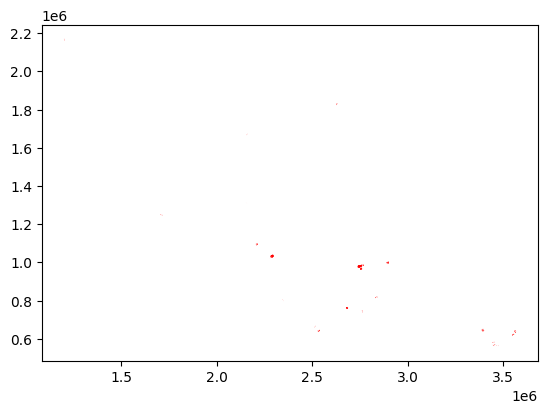

In [ ]:
nuevos_ID2.plot(color='red')
#Gómez_Palacio_Jiménez.plot(ax=axis,color='blue',figsize=(40, 40))

In [ ]:
carreteras_sin_cob=cf_con_ID[['NOMBRE','Estado','geometry','ID_RED']]

In [ ]:
carreteras_sin_cob_diss=carreteras_sin_cob.dissolve(by='NOMBRE', aggfunc={'ID_RED':'count','Estado':'nunique'})

In [ ]:
carreteras_sin_cob_diss

,geometry,ID_RED,Estado
NOMBRE,,,
4 Caminos - Cercalisa,"MULTILINESTRING ((2351302.071 837544.376, 2351...",34,1
A Aguascalientes,"MULTILINESTRING ((2506315.745 1038725.053, 250...",15,1
A Cerro Gordo,"MULTILINESTRING ((2720957.081 931821.611, 2721...",22,1
A Ent. Maxipista Guadalajara - Tepic,"MULTILINESTRING ((2307189.948 984149.533, 2307...",5,1
A Guadalajara,"MULTILINESTRING ((2598508.978 1123579.978, 259...",4,1
...,...,...,...
Zihuatanejo - La Mira,"MULTILINESTRING ((2534249.447 643305.797, 2534...",248,2
Zihuatanejo - Playa Azul,"MULTILINESTRING ((2486920.713 664948.153, 2487...",52,1
Zitácuaro - Ciudad Altamirano,"MULTILINESTRING ((2657954.590 805020.136, 2657...",337,1


<Axes: >

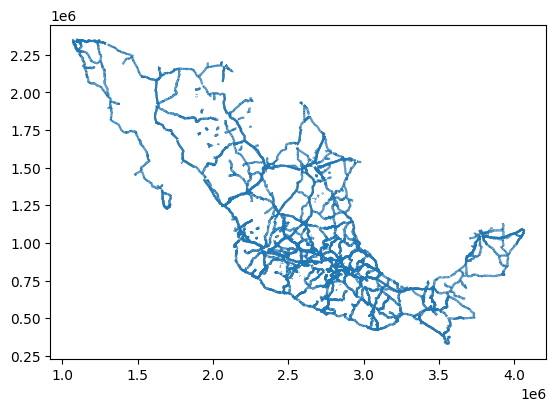

In [ ]:
carreteras_sin_cob_diss.plot()

<Axes: >

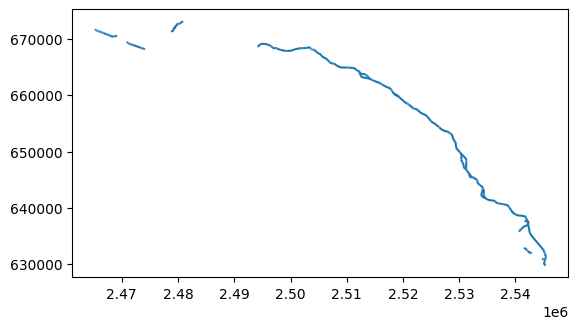

In [ ]:
axis=carreteras_sin_cob_diss.loc[carreteras_sin_cob_diss['Nombre']=='Zihuatanejo - La Mira'].plot()

In [ ]:
# prompt: agregar el index una nueva columna 'Nombre'

carreteras_sin_cob_diss['Nombre'] = carreteras_sin_cob_diss.index


In [ ]:
carreteras_sin_cob_diss

,geometry,ID_RED,Estado,Nombre
NOMBRE,,,,
4 Caminos - Cercalisa,"MULTILINESTRING ((2351302.071 837544.376, 2351...",34,1,4 Caminos - Cercalisa
A Aguascalientes,"MULTILINESTRING ((2506315.745 1038725.053, 250...",15,1,A Aguascalientes
A Cerro Gordo,"MULTILINESTRING ((2720957.081 931821.611, 2721...",22,1,A Cerro Gordo
A Ent. Maxipista Guadalajara - Tepic,"MULTILINESTRING ((2307189.948 984149.533, 2307...",5,1,A Ent. Maxipista Guadalajara - Tepic
A Guadalajara,"MULTILINESTRING ((2598508.978 1123579.978, 259...",4,1,A Guadalajara
...,...,...,...,...
Zihuatanejo - La Mira,"MULTILINESTRING ((2534249.447 643305.797, 2534...",248,2,Zihuatanejo - La Mira
Zihuatanejo - Playa Azul,"MULTILINESTRING ((2486920.713 664948.153, 2487...",52,1,Zihuatanejo - Playa Azul
Zitácuaro - Ciudad Altamirano,"MULTILINESTRING ((2657954.590 805020.136, 2657...",337,1,Zitácuaro - Ciudad Altamirano


In [ ]:
sin_cobertura_nuevos_ID=pd.concat([sin_cobertura_nuevos_ID, nuevos_ID2], ignore_index=False)


<Axes: >

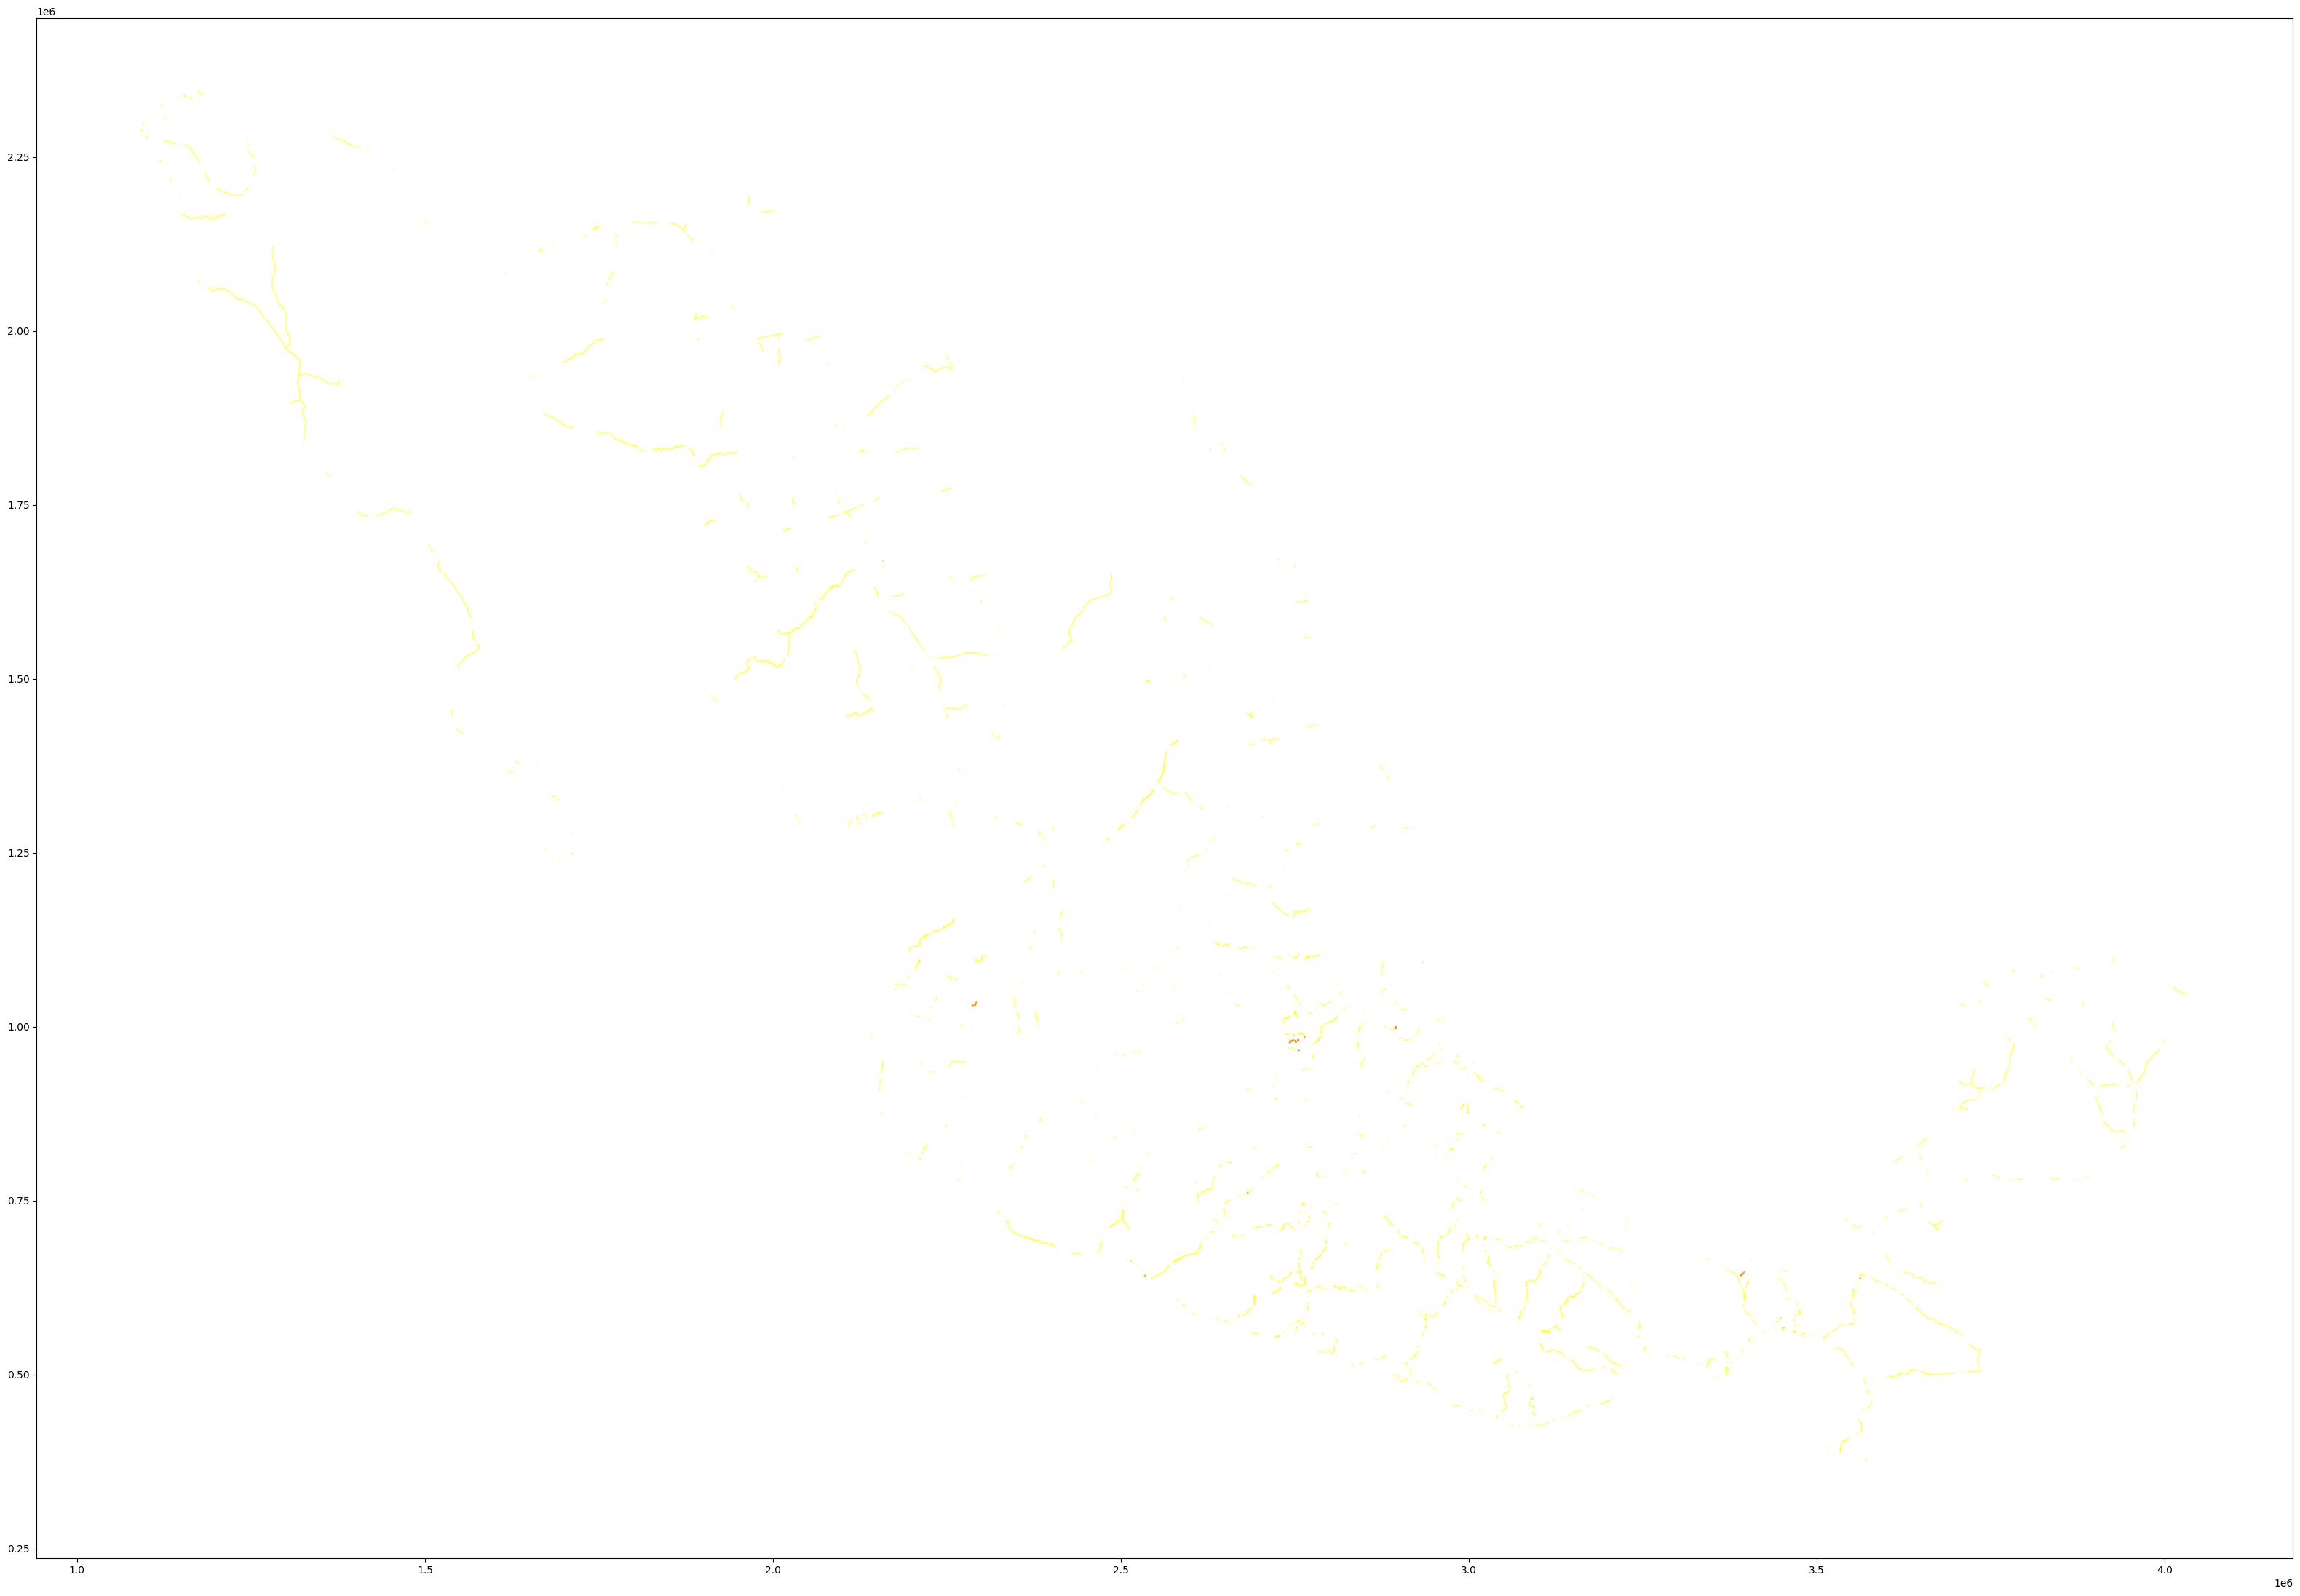

In [ ]:
axis=nuevos_ID2.plot(color='red',figsize=(40, 40))
sin_cobertura_nuevos_ID.plot(ax=axis,color='yellow',alpha=0.5,figsize=(40, 40))

In [ ]:
yuc=sin_ID.loc[sin_ID['Estado']=='Nayarit']#.plot(color='red',figsize=(20,20))


<Axes: >

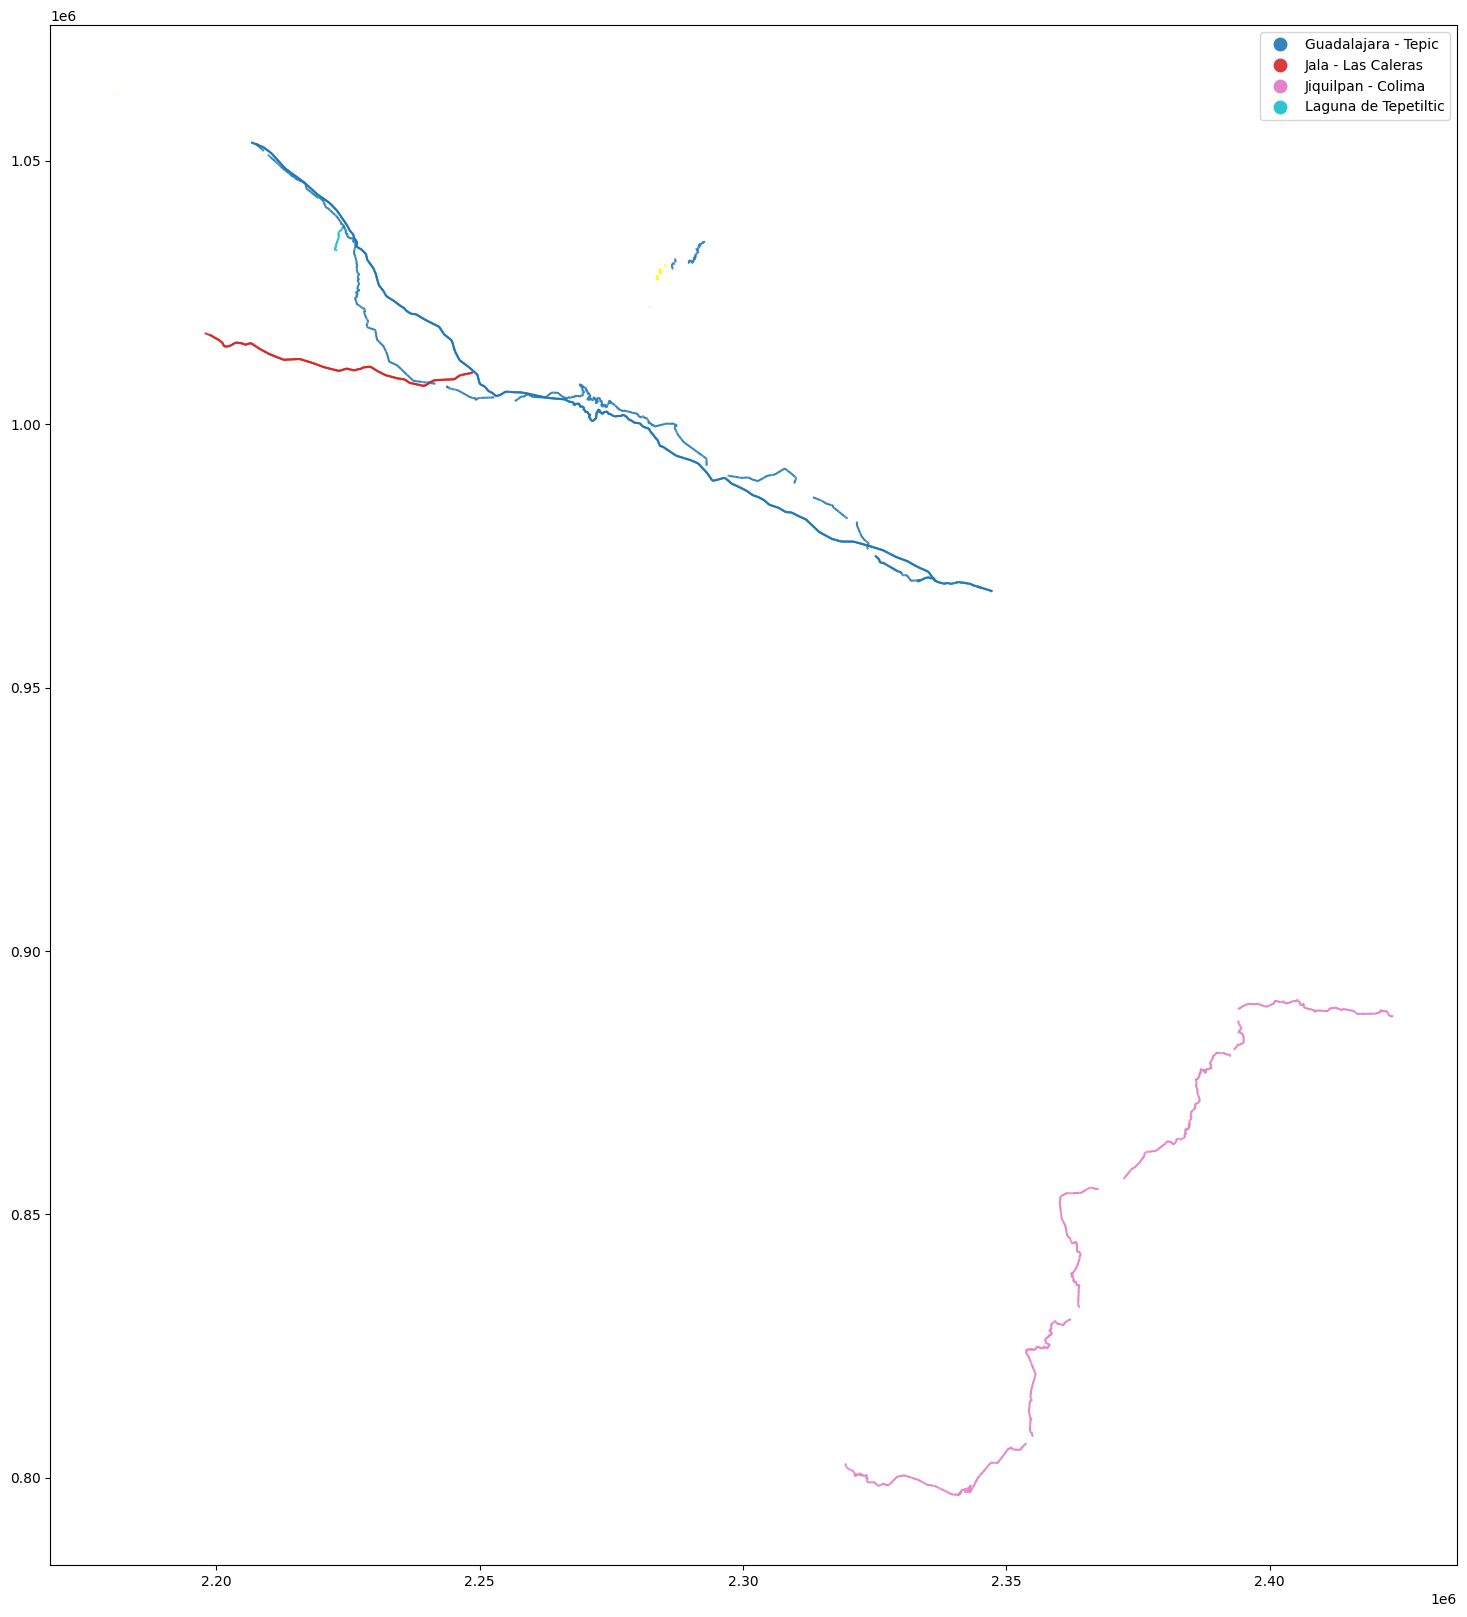

In [ ]:
axis=yuc.plot(color='yellow',figsize=(20,20))
cf_con_ID.loc[(cf_con_ID['NOMBRE']=='Guadalajara - Tepic')|(cf_con_ID['NOMBRE']=='Jala - Las Caleras')|(cf_con_ID['NOMBRE']=='Jiquilpan - Colima')|(cf_con_ID['NOMBRE']=='Laguna de Tepetiltic')].plot(ax=axis, column='NOMBRE',alpha=0.9,legend=True,figsize=(20,20))